# Préparation initiale dataset

## Récupération du dataset et filtres de données

In [85]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

data_T0 = pd.read_csv("C:/Users/Farida/Documents/Data_Science/P6/flipkart_com-ecommerce_sample_1050.csv", low_memory=False)

In [2]:
!pip install kneed

In [3]:
data_T0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
product_rating = data_T0.value_counts('product_rating')
print(product_rating)

data_T0['product_rating'] = data_T0['product_rating'].str.replace('No rating available','NaN')
data_T0['product_rating'] = data_T0['product_rating'].astype(float)
data_T0['product_rating'] = data_T0['product_rating'].fillna(value=3)

data_T0.head()

product_rating
No rating available    889
5                       43
4                       21
3                       12
4.5                     10
1                       10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
4.7                      3
4.4                      3
2.3                      3
3.8                      3
3.6                      3
4.8                      2
3.9                      1
2.5                      1
1.5                      1
3.3                      1
2.2                      1
3.2                      1
4.9                      1
3.1                      1
2.7                      1
dtype: int64


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,3.0,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,3.0,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,3.0,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,3.0,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,3.0,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [5]:
#Category Spliting
data_T0[['Category_1', 'Category_2', 'Category_3', '1', '2', '3', '4']] = data_T0['product_category_tree'].str.split('>>', expand=True)

#Dropping of unwanted columns
data_T0 = data_T0.drop(columns=['1', '2', '3', '4'])

#Removal of unwanted symbols
data_T0['Category_1'] = data_T0['Category_1'].str.replace('[','').astype(str)
data_T0['Category_1'] = data_T0['Category_1'].str.replace('"','').astype(str)
data_T0['Category_2'] = data_T0['Category_2'].str.replace(']','').astype(str)
data_T0['Category_2'] = data_T0['Category_2'].str.replace('"','').astype(str)
data_T0['Category_3'] = data_T0['Category_3'].str.replace(']','').astype(str)
data_T0['Category_3'] = data_T0['Category_3'].str.replace('"','').astype(str)


data_T0.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Category_1,Category_2,Category_3
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,3.0,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,3.0,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,3.0,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,3.0,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,3.0,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets


In [6]:
Category_1 = data_T0.value_counts('Category_1')
print(Category_1)

Category_1
Baby Care                      150
Beauty and Personal Care       150
Computers                      150
Home Decor & Festive Needs     150
Home Furnishing                150
Kitchen & Dining               150
Watches                        150
dtype: int64


In [7]:
Category_2 = data_T0.value_counts('Category_2')
print(Category_2)

Category_2
 Wrist Watches                 149
 Laptop Accessories             87
 Infant Wear                    84
 Coffee Mugs                    74
 Showpieces                     71
                              ... 
 Dinnerware & Crockery           1
 Men's Grooming                  1
 Beauty Accessories              1
 Kripa's Home Furnishing         1
 Consumables & Disposables       1
Length: 63, dtype: int64


In [8]:
data_T = data_T0

In [9]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Farida\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Nettoyage du texte 

In [10]:
# Tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('"', ' ').replace('>>', ' ').replace('[', ' ').replace(']', ' ').replace("'", ' ').replace("(", ' ').replace(")", ' ').replace(",", ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data_T['sentence_bow'] = data_T0['product_category_tree'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T0['product_category_tree'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T0['product_category_tree'].apply(lambda x : transform_dl_fct(x))
data_T.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Farida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Farida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Farida\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(1050, 21)

In [11]:
data_T.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,Category_1,Category_2,Category_3,sentence_bow,sentence_bow_lem,sentence_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,3.0,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,home furnishing curtains accessories curtains ...,home furnishing curtain accessory curtain eleg...,home furnishing curtains & accessories curtain...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,3.0,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,baby care baby bath skin baby bath towels sath...,baby care baby bath skin baby bath towel sathi...,baby care baby bath & skin baby bath towels sa...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,3.0,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,baby care baby bath skin baby bath towels euro...,baby care baby bath skin baby bath towel euros...,baby care baby bath & skin baby bath towels eu...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,3.0,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,home furnishing bed linen bedsheets santosh ro...,home furnishing bed linen bedsheets santosh ro...,home furnishing bed linen bedsheets santosh ro...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,3.0,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,home furnishing bed linen bedsheets jaipur pri...,home furnishing bed linen bedsheets jaipur pri...,home furnishing bed linen bedsheets jaipur pri...


In [12]:
data_T['sentence_bow'].value_counts()

home furnishing bed linen blankets quilts dohars                       56
kitchen dining coffee mugs prithish coffee mugs                        26
watches wrist watches maxima wrist watches                             23
kitchen dining coffee mugs rockmantra coffee mugs                      22
watches wrist watches sonata wrist watches                             21
                                                                       ..
home decor festive needs showpieces ethnic infinity india ethnic        1
home decor festive needs showpieces ethnic ravishing variety ethnic     1
home decor festive needs showpieces ethnic handicrafts ethnic           1
home decor festive needs showpieces ethnic homedesires ethnic           1
watches wrist watches only kidz wrist watches                           1
Name: sentence_bow, Length: 634, dtype: int64

In [13]:
data_T['sentence_bow_lem'].value_counts()

home furnishing bed linen blanket quilt dohars                       56
kitchen dining coffee mug prithish coffee mug                        26
watch wrist watch maximum wrist watch                                23
kitchen dining coffee mug rockmantra coffee mug                      22
watch wrist watch sonata wrist watch                                 21
                                                                     ..
home decor festive need showpiece ethnic infinity india ethnic        1
home decor festive need showpiece ethnic ravishing variety ethnic     1
home decor festive need showpiece ethnic handicraft ethnic            1
home decor festive need showpiece ethnic homedesires ethnic           1
watch wrist watch only kidz wrist watch                               1
Name: sentence_bow_lem, Length: 634, dtype: int64

In [14]:
data_T['sentence_dl'].value_counts()

home furnishing bed linen blankets quilts & dohars                                                                                            56
kitchen & dining coffee mugs prithish coffee mugs                                                                                             26
watches wrist watches maxima wrist watches                                                                                                    23
kitchen & dining coffee mugs rockmantra coffee mugs                                                                                           22
home furnishing bath linen towels                                                                                                             19
                                                                                                                                              ..
baby care infant wear baby girls clothes bodysuits & sleepsuits sleepsuits rute sleepsuits rute baby girl s sleepsuit             

In [15]:
data_T.to_csv('C:/Users/Farida/Documents/Data_Science/P6/FlipKart.csv')

# Préparation commune des traitements

In [16]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from sklearn.cluster import KMeans
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

## Lecture dataset

In [17]:
data_T =  pd.read_csv("C:/Users/Farida/Documents/Data_Science/P6/FlipKart.csv")
print(data_T.shape)

l_cat = list(set(data_T['Category_1']))
print("Categories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_T.iloc[i]['Category_1'])) for i in range(len(data_T))]

from nltk.tokenize import sent_tokenize, word_tokenize

data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())

(1050, 22)
Categories :  ['Home Decor & Festive Needs ', 'Baby Care ', 'Computers ', 'Beauty and Personal Care ', 'Kitchen & Dining ', 'Watches ', 'Home Furnishing ']
max length bow :  26
max length dl :  29


## Fonctions communes

In [18]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categories")
    plt.title('Representation of products by categories')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Representation of products by clusters')
    
    plt.show()
    print("ARI : ", ARI)
    
def KMeans_Clustering(n_clusters, data):

  # defining the kmeans function with initialization as k-means++
  kmeans = KMeans(n_clusters, init='k-means++', random_state = 42)

  # fitting the k means algorithm on the data
  kmeans_data = kmeans.fit(data)
    
  kMeans_features = (kmeans_data.labels_).reshape(-1, 1)

  return kMeans_features

# Bag of word - Tf-idf

## Préparation sentences

In [19]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'

cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])



In [20]:
n_clusters = 7

cv_transform_kMeans = KMeans_Clustering(n_clusters, cv_transform)


In [21]:
n_clusters = 7

ctf_transform_kMeans = KMeans_Clustering(n_clusters, ctf_transform)

## Exécution des modèles

print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform_kMeans)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform_kMeans)

CountVectorizer : 
-----------------
ARI :  0.5823 time :  14.0

Tf-idf : 
--------
ARI :  0.4363 time :  13.0


In [22]:
ARI, X_tsne, labels = ARI_fct(ctf_transform_kMeans)

ARI :  0.4363 time :  13.0


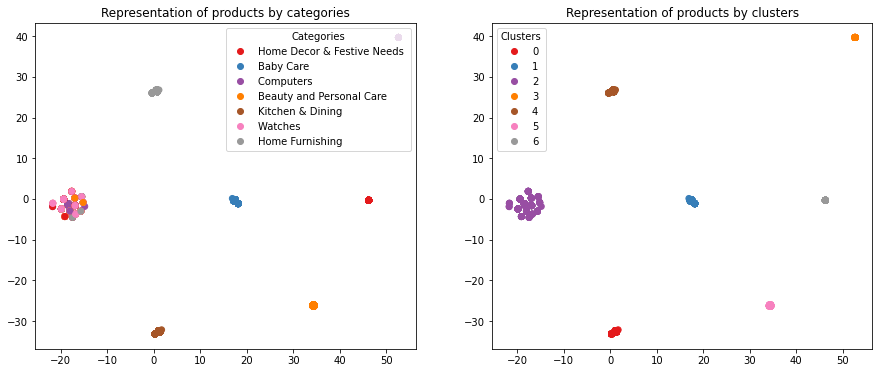

ARI :  0.4363


In [23]:
## Graphiques

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Word2Vec

In [24]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

In [25]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 30 # adapt to length of sentences
sentences = data_T['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                               workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Build & train Word2Vec model ...
Vocabulary size: 1316
Word2Vec trained
Fit Tokenizer ...
Number of unique words: 1317


## Création de la matrice d'embedding

In [26]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (1317, 300)


## Création du modèle d'embedding

In [27]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

## Exécution du modèle

embeddings = embed_model.predict(x_sentences)
embeddings.shape

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           395100    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 395,100
Trainable params: 395,100
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [28]:
n_clusters = 7

embeddings_kMeans = KMeans_Clustering(n_clusters, embeddings)

In [29]:
ARI, X_tsne, labels = ARI_fct(embeddings_kMeans)

ARI :  0.7548 time :  13.0


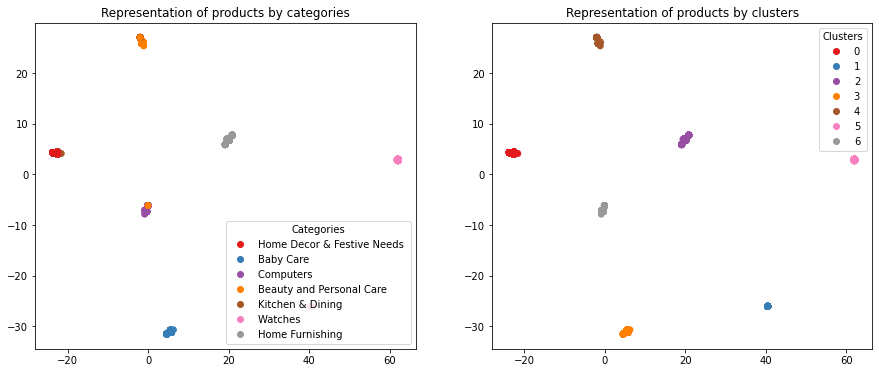

ARI :  0.7548


In [30]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [31]:
!pip install transformers

In [32]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [33]:
# Bert
import os
from  transformers import TFAutoModel, AutoTokenizer
from transformers import *

os.environ["TF_KERAS"]='1'

## Fonctions communes

In [34]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

In [35]:
# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [36]:
max_length = 8
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['sentence_dl'].to_list()



In [37]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 187ms/step
temps traitement :  34.0


In [39]:
n_clusters = 7

kMeans_features = KMeans_Clustering(n_clusters, features_bert)


In [40]:
ARI, X_tsne, labels = ARI_fct(kMeans_features)

ARI :  0.9956 time :  11.0


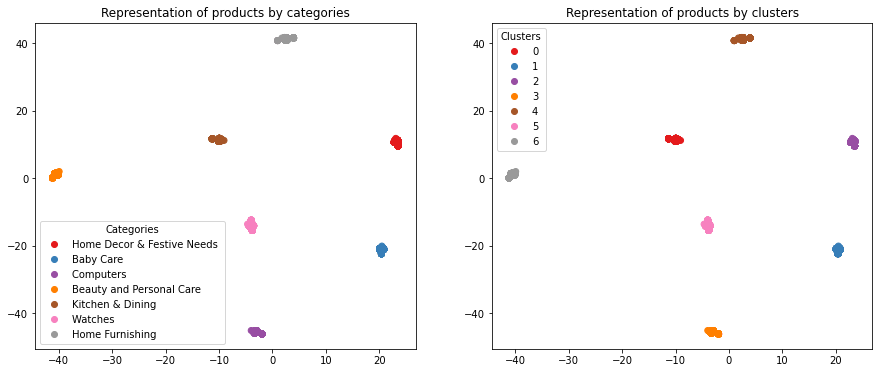

ARI :  0.9956


In [41]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### 'cardiffnlp/twitter-roberta-base-sentiment'

In [42]:
# Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

max_length = 8
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['sentence_dl'].to_list()

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 187ms/step
temps traitement :  34.0


In [43]:
n_clusters = 7

kMeans_features = KMeans_Clustering(n_clusters, features_bert)

In [44]:
ARI, X_tsne, labels = ARI_fct(kMeans_features)

ARI :  0.9956 time :  12.0


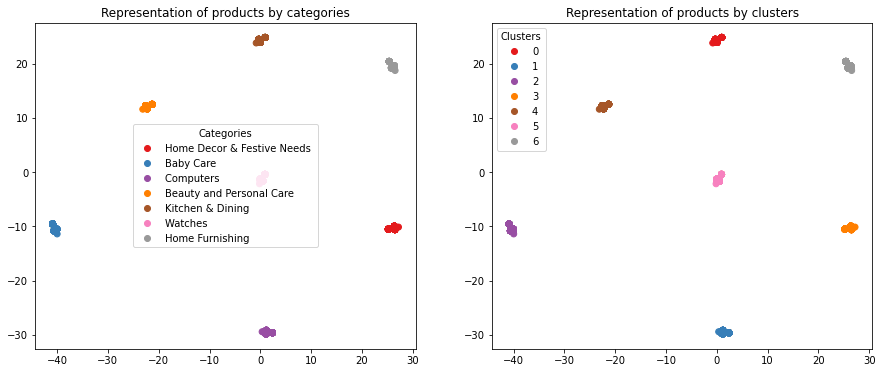

ARI :  0.9956


In [45]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Testing Hugging Face models : roberta-large-mnli

In [46]:
max_length = 8
batch_size = 10
model_type = 'roberta-large-mnli'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['sentence_dl'].to_list()

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 643ms/step
temps traitement :  108.0


In [47]:
n_clusters = 7

kMeans_features = KMeans_Clustering(n_clusters, features_bert)

In [48]:
ARI, X_tsne, labels = ARI_fct(kMeans_features)

ARI :  0.3566 time :  12.0


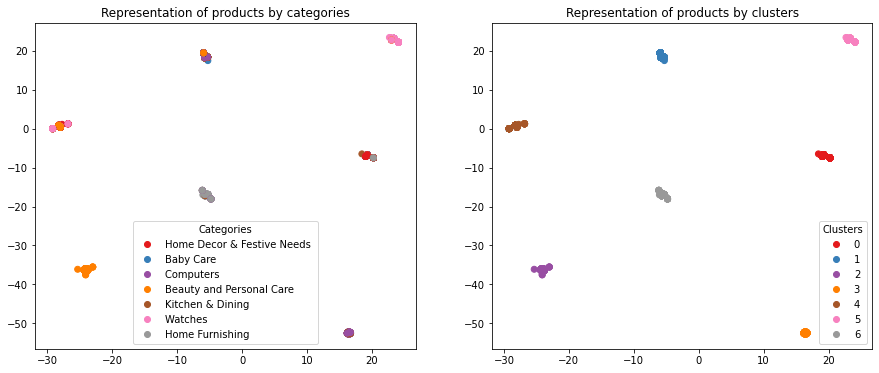

ARI :  0.3566


In [49]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT hub Tensorflow

In [50]:
!pip install tensorflow-text

In [51]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

sentences = data_T['sentence_dl'].to_list()

max_length = 8
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  28.0


In [52]:
n_clusters = 7

kMeans_features = KMeans_Clustering(n_clusters, features_bert)

In [53]:
ARI, X_tsne, labels = ARI_fct(kMeans_features)

ARI :  0.9956 time :  14.0


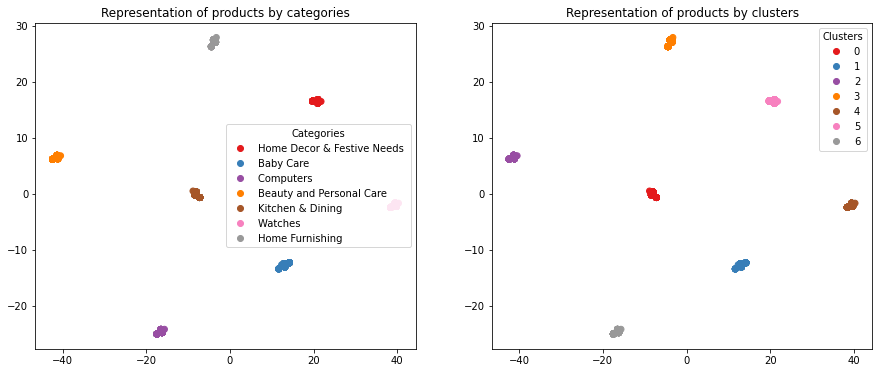

ARI :  0.9956


In [54]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder

In [55]:
!pip install sacremoses

In [56]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [57]:
# Bert
import transformers
import os
from transformers import *

os.environ["TF_KERAS"]='1'

In [58]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [59]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

batch_size = 10
sentences = data_T['sentence_dl'].to_list()

features_USE = feature_USE_fct(sentences, batch_size)

In [60]:
n_clusters = 7

kMeans_features = KMeans_Clustering(n_clusters, features_USE)

In [61]:
ARI, X_tsne, labels = ARI_fct(kMeans_features)

ARI :  0.9737 time :  13.0


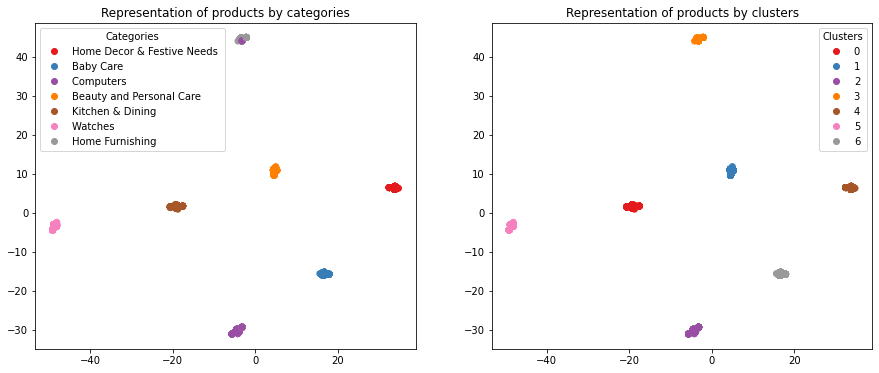

ARI :  0.9737


In [62]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# SIFT

## Import du dataset

In [86]:
#pip install opencv-contrib-python

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

path = "C:/Users/farida/Documents/Data_Science/P6/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [88]:
data_T = pd.read_csv("C:/Users/Farida/Documents/Data_Science/P6/flipkart.csv", low_memory=False)

In [89]:
data_T.head()

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,...,product_rating,overall_rating,brand,product_specifications,Category_1,Category_2,Category_3,sentence_bow,sentence_bow_lem,sentence_dl
0,0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,...,3.0,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,home furnishing curtains accessories curtains ...,home furnishing curtain accessory curtain eleg...,home furnishing curtains & accessories curtain...
1,1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,...,3.0,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,baby care baby bath skin baby bath towels sath...,baby care baby bath skin baby bath towel sathi...,baby care baby bath & skin baby bath towels sa...
2,2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,...,3.0,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,baby care baby bath skin baby bath towels euro...,baby care baby bath skin baby bath towel euros...,baby care baby bath & skin baby bath towels eu...
3,3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,...,3.0,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,home furnishing bed linen bedsheets santosh ro...,home furnishing bed linen bedsheets santosh ro...,home furnishing bed linen bedsheets santosh ro...
4,4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,...,3.0,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,home furnishing bed linen bedsheets jaipur pri...,home furnishing bed linen bedsheets jaipur pri...,home furnishing bed linen bedsheets jaipur pri...


## Création des labels des photos à partir du nom des images

In [90]:
from sklearn import preprocessing

list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", 
               "Home Decor & Festive Needs", "Home Furnishing", "Kitchen & Dining", "Watches"]
label_name = "no_name"
 
data = pd.DataFrame()
list_photos = data_T['image']
data["image_path"] = list_photos
Reduced_df = data_T[['image', 'Category_1']]
Reduced_df.rename(columns = {'image':'image_path'}, inplace = True)
Reduced_df.rename(columns = {'Category_1':'label_name'}, inplace = True)
data = pd.merge(data, Reduced_df, how="left", on="image_path")
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])
data

,image_path,label_name,label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,0


In [91]:
data.groupby("label").count()

,image_path,label_name
label,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


## Affichage d'exemples d'images par label

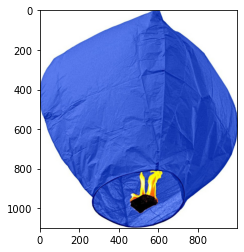

In [92]:
from pylab import imread,subplot,imshow,show

import matplotlib.pyplot as plt

image = imread('0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg') 

plt.imshow(image)

plt.show()

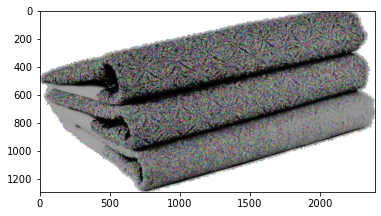

Descripteurs :  (47651, 128)

[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [93]:
from matplotlib.image import imread
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


## Détermination et affichage des descripteurs SIFT

* L'image contient 47651 descripteurs
* Chaque descripteur est un vecteur de longueur 128

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [94]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           498.13 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [95]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :            12.64 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [96]:
sift_keypoints_all.shape

(517351, 128)

In [97]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           174.26 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [98]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 498)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [99]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
* No separation between different groups

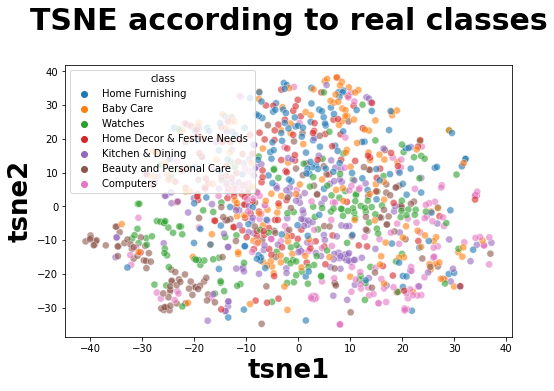

In [100]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE according to real classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [101]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=5, random_state=6) # play with number
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0,06 reste très bas

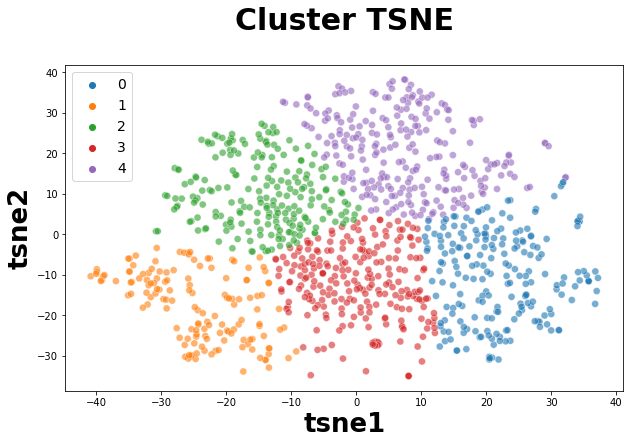

ARI :  0.06102999620037835


In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('Cluster TSNE', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne

In [103]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    209
1    145
2    212
3    237
4    247
Name: class, dtype: int64

In [104]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[32  7 31 27 53  0  0]
 [28 64 22 20 16  0  0]
 [62 11 19 39 19  0  0]
 [12  2 62 33 41  0  0]
 [21  8 28 17 76  0  0]
 [19 15 35 61 20  0  0]
 [35 38 15 40 22  0  0]]


In [105]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[ 0 53  0 27 31  7 32]
 [ 0 16  0 20 22 64 28]
 [ 0 19  0 39 19 11 62]
 [ 0 41  0 33 62  2 12]
 [ 0 76  0 17 28  8 21]
 [ 0 20  0 61 35 15 19]
 [ 0 22  0 40 15 38 35]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.06      0.11      0.08       150
           2       0.00      0.00      0.00       150
           3       0.14      0.22      0.17       150
           4       0.13      0.19      0.15       150
           5       0.10      0.10      0.10       150
           6       0.17      0.23      0.19       150

    accuracy                           0.12      1050
   macro avg       0.09      0.12      0.10      1050
weighted avg       0.09      0.12      0.10      1050



<AxesSubplot:>

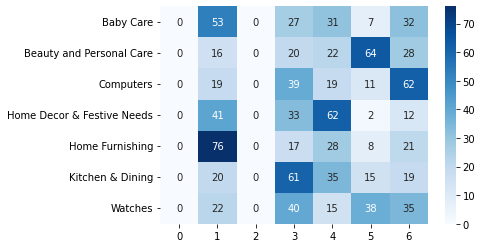

In [106]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# CNN Transfer Learning

In [107]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from os import listdir

In [108]:
path = "C:/Users/farida/Documents/Data_Science/P6/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


## VGG16

In [109]:
from keras.layers import Flatten
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
import keras

IMSIZE = [224, 224]
def create_model():
    vgg = VGG16(input_shape=(224, 224, 3), weights='imagenet')
 
    # Freeze existing VGG already trained weights
    for layer in vgg.layers:
        layer.trainable = False
     
    # get the VGG output
    x = vgg.layers[-2].output
    model = Model(inputs=vgg.input, outputs=x)
     
    model.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
     
    model.summary()
     
    return model
 
mymodel = create_model()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [110]:
import cv2

for i in data.index:
    test = plt.imread(path+data['image_path'][i])
    test_res = cv2.resize(test, dsize=IMSIZE, interpolation=cv2.INTER_CUBIC)
    images_list = []
    images_list.append(np.array(test_res))

    x = np.asarray(images_list)
    pred = mymodel.predict(x)
    if i == 0:
        result = pred
    else:
        result = np.concatenate((result,pred))

1/1 [==============================] - 0s 308ms/step


1/1 [==============================] - 0s 322ms/step


1/1 [==============================] - 0s 303ms/step


1/1 [==============================] - 0s 302ms/step


1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 324ms/step


1/1 [==============================] - 0s 327ms/step


In [111]:
result.shape

(1050, 4096)

In [112]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
VGG16_X_tsne = tsne.fit_transform(result)

VGG16_df_tsne = pd.DataFrame(VGG16_X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
VGG16_df_tsne["class"] = data["label_name"]
print(VGG16_df_tsne.shape)

(1050, 3)


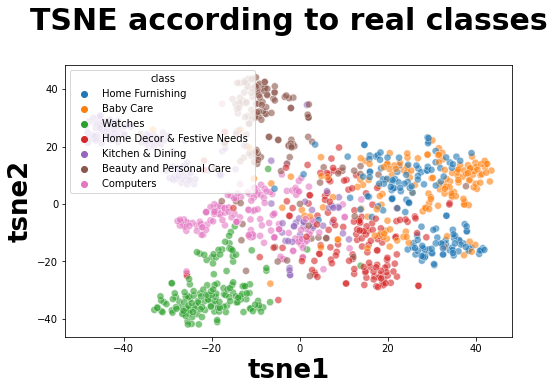

In [113]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=VGG16_df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE according to real classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [114]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=6, random_state=6) # play with number
cls.fit(VGG16_X_tsne)

VGG16_df_tsne["cluster"] = cls.labels_
print(VGG16_df_tsne.shape)

(1050, 4)


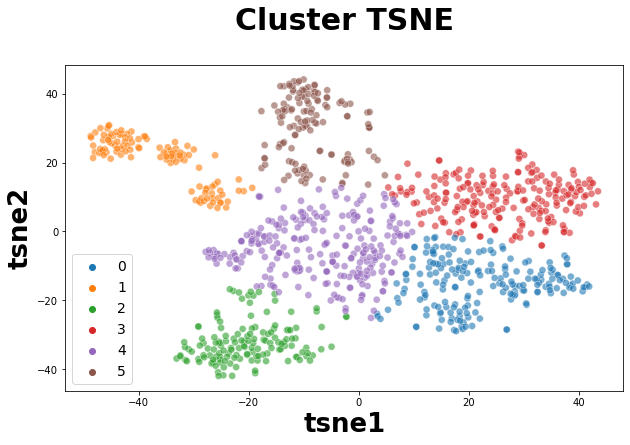

ARI :  0.4626335527958746


In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=6), s=50, alpha=0.6,
    data=VGG16_df_tsne,
    legend="brief")

plt.title('Cluster TSNE', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

For text classification the following results for ARI have been obtained:

CountVectorizer
ARI = 0.5823

Tf-idf 
ARI = 0.4363

Word2Vec 
ARI = 0.7548

BERT Base Uncased 
ARI = 0.9956, Calculation time = 11s

twitter-roberta-base-sentiment 
ARI = 0.9956, Calculation time = 12s

roberta-large-mnli 
ARI= 0.3566

BERT tensorflow 
ARI= 0.9956, Calculation time = 14s

USE 
ARI=0.9737

For image classification the following results for ARI have been obtained:

SIFT 
ARI = 0.061 (for 5 clusters)

VGG16 
ARI = 0.46 (for 6 clusters)

Given these results, the recommendation would be to use BERT Base Uncased for the test classification as it was the quickest of the top scoring models and VGG16 for image classification.
